<a href="https://colab.research.google.com/github/Rajas1211/Kaggle-MNIST-Digit-Recognizer/blob/master/KaggleMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit recognition Kaggle Competition

## Mounting the Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import necessary libraries

In [37]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL.ImageColor import getrgb
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Dense, Flatten
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import shutil
import datetime
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Set path to training and test file


## Data Preparation

In [4]:
test= pd.read_csv("/content/drive/My Drive/Kaggle MNIST/test.csv")
train= pd.read_csv("/content/drive/My Drive/Kaggle MNIST/train.csv")

In [5]:
print(test.shape,train.shape)

(28000, 784) (42000, 785)


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Drop label Column in Training
#### No changes to be made in test file

In [7]:
X_train=train.drop(['label'],axis=1)
y_train=train['label']
X_test=test

In [8]:
X_train.shape

(42000, 784)

#### Converting the Matrix into 2D which is necessary for CNN

In [9]:
|X_train=X_train.values.reshape(-1,28,28,1)

In [10]:
X_test=X_test.values.reshape(-1,28,28,1)

#### Normalisation
#### The pixel values are in the range 0 to 255, hence they are divided by 255 for normalisation for faster convergence

In [11]:
X_test=X_test/255
X_train=X_train/255

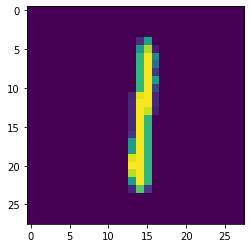

In [12]:
plt.imshow(X_test[200][:,:,0])

In [13]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


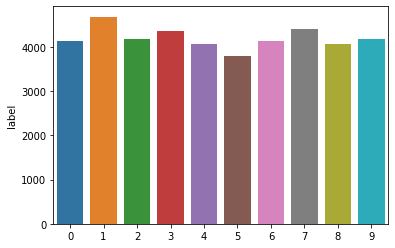

In [14]:
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts())

In [15]:
y_train=tf.keras.utils.to_categorical(y_train)

## Image Augmentation using ImageDataGenerator

In [16]:
from keras.preprocessing.image import ImageDataGenerator
BS=32

train_datagen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.2,
    validation_split=0.2
)

training_set = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size= BS,
    shuffle= True,
    subset= 'training')

validation_set=train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size= BS,
    shuffle= True,
    subset= 'validation'
)

In [18]:
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow(
    x = X_test,
    y = None,
    batch_size = BS,
    shuffle = False)

## Creating the model
## The Kernel sizes are (5 x 5) then (3 x 3). Initially (5x5) is used to capture maximum information

In [19]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

## Compiling the model: Epoch set to 25

In [27]:
EPOCHS=25
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
test_model=cnn.fit(training_set,validation_data=validation_set,epochs=EPOCHS)

Epoch 1/25
1050/1050 [==============================] - 118s 112ms/step - loss: 0.1539 - accuracy: 0.9520 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 2/25
1050/1050 [==============================] - 116s 111ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0548 - val_accuracy: 0.9839
Epoch 3/25
1050/1050 [==============================] - 121s 115ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0429 - val_accuracy: 0.9867
Epoch 4/25
1050/1050 [==============================] - 115s 109ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0582 - val_accuracy: 0.9839
Epoch 5/25
1050/1050 [==============================] - 114s 109ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0483 - val_accuracy: 0.9871
Epoch 6/25
1050/1050 [==============================] - 114s 109ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.0574 - val_accuracy: 0.9862
Epoch 7/25
1050/1050 [==============================] - 114s 109ms/step - loss: 0.0240 - accuracy: 0.9923 - val_

In [29]:
print(test_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plotting training accuracy and validaiton accuracy 

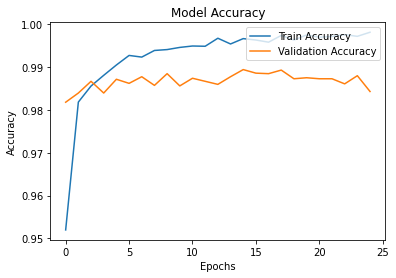

In [30]:
# Plotting training accuracy and validaiton accuracy 
plt.plot(test_model.history['accuracy'])
plt.plot(test_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'upper right')
plt.show()

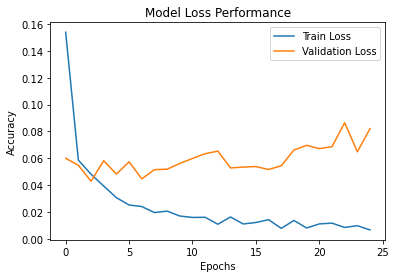

In [31]:
# Plotting training loss and validaiton loss
plt.plot(test_model.history['loss'])
plt.plot(test_model.history['val_loss'])
plt.title('Model Loss Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')
plt.show()

In [32]:
# Final model
cnn.fit(training_set, validation_data = validation_set, epochs = 4)

Epoch 1/4
1050/1050 [==============================] - 115s 110ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0655 - val_accuracy: 0.9898
Epoch 2/4
1050/1050 [==============================] - 115s 109ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0687 - val_accuracy: 0.9880
Epoch 3/4
1050/1050 [==============================] - 119s 113ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0848 - val_accuracy: 0.9857
Epoch 4/4
1050/1050 [==============================] - 115s 110ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0718 - val_accuracy: 0.9883


# Submission file

In [36]:
predict = cnn.predict_classes(test_set)
 # Writing the test results to a separate dataframe
submission = pd.DataFrame()
submission['ImageId'] = pd.Series(range(1,28001))
submission['Label'] = predict
submission.to_csv('/content/drive/My Drive/Kaggle MNIST/submission.csv', index = False)